<a href="https://colab.research.google.com/github/Nemit-jindal/ML_Clustering/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=1)

In [3]:
x

array([[-3.05837272,  4.48825769],
       [-8.60973869, -3.72714879],
       [ 1.37129721,  5.23107449],
       ...,
       [-1.91854276,  4.59578307],
       [-1.79600465,  4.28743568],
       [-6.97684609, -8.89498834]])

In [5]:
y# In USL you will not use y

array([0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0,
       0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1,

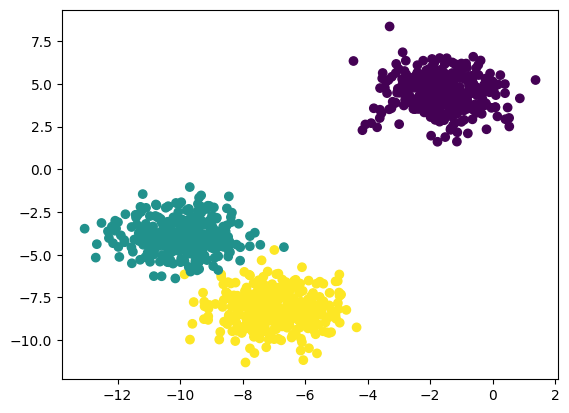

In [10]:
plt.scatter(x[:,0],x[:,1],c=y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [12]:
x_train.shape,x_test.shape

((700, 2), (300, 2))

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

In [14]:
kmeans

KMeans(n_clusters=3)

In [15]:
kmeans.fit(x_train)

KMeans(n_clusters=3)

In [16]:
y_labels=kmeans.predict(x_train)

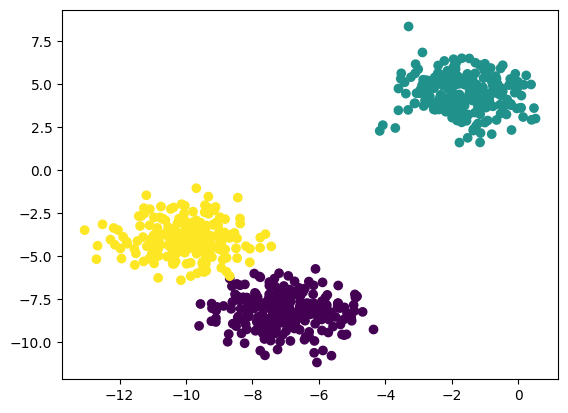

In [17]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(x_train,kmeans.labels_)

0.7179451230427786

In [22]:
kmeans.inertia_# for k=3,you have wcss distance

1405.68005178494

In [23]:
#to select k(centroid)>> elbow method
wcss=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)

In [24]:
wcss

[29004.511743610456,
 4501.242392684225,
 1405.68005178494,
 1212.3942323575752,
 1044.0598137355385,
 909.9540845029059,
 807.8426451899788,
 706.1038158506415,
 615.8981513503414]

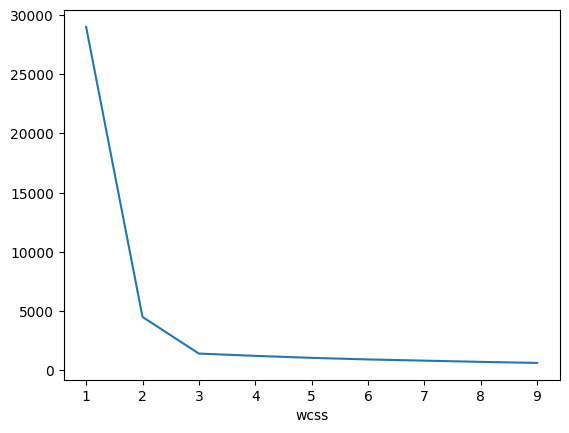

In [26]:
#plot elbow curve
plt.plot(range(1,10),wcss)
plt.xticks(range(1,10))
plt.xlabel("wcss")
plt.show()

In [27]:
#based on above plot the optimal number of k cluster is 3

In [28]:
!pip install kneed

In [30]:
from kneed import KneeLocator
k1=KneeLocator(range(1,10),wcss,curve='convex',direction='decreasing')

In [31]:
k1.elbow

2

In [32]:
silhouette_coeff=[]
for k in range(2,10):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(x_train)
  score=silhouette_score(x_train,kmeans.labels_)
  silhouette_coeff.append(score)

In [33]:
silhouette_coeff

[0.7674998364431159,
 0.7179451230427786,
 0.5936125280998396,
 0.42133498800750097,
 0.32864740058089875,
 0.33378973578622734,
 0.3419698155056273,
 0.347730182261904]